# Introduction to ScikitLearn

## Workflow:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Getting data ready

Main things to do:
* Split data into features and labels (i.e. 'X' and 'y')
* Filling or diregarding missing values
* Converting non-numerical values into numerical values (feature encoding)

In [2]:
heart_disease_data = pd.read_csv("data/heart-disease.csv")
heart_disease_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Create feature matrix X
X = heart_disease_data.drop("target", axis=1)

X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [4]:
# Create labels y
y = heart_disease_data["target"]

In [5]:
# Splitting data into training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [7]:
X.shape

(303, 13)

In [8]:
303 * 0.8

242.4

In [9]:
# Converting string values into numerical values for ml model
car_sales_sample = pd.read_csv("data/car-sales-extended.csv")
car_sales_sample.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [10]:
car_sales_sample.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [11]:
# Split data to X and y
X = car_sales_sample.drop("Price", axis=1)
y = car_sales_sample["Price"]

In [12]:
# Doors can also be considered categorical
car_sales_sample["Doors"].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [13]:
# We need to change "Make" and "Colour" into numerical values
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
transformedX = transformer.fit_transform(X)
pd.DataFrame(transformedX).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


In [14]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [15]:
# there is another way to do it in pandas
dummies = pd.get_dummies(car_sales_sample[["Make", "Colour", "Doors"]])
dummies.head()

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0


In [16]:
# fit it to a model
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

model = RandomForestRegressor()
X_train, X_test, y_train, y_test = train_test_split(transformedX, y, test_size=0.2)
model.fit(X_train, y_train)

RandomForestRegressor()

In [17]:
model.score(X_test, y_test)

0.3235867221569877

In [18]:
# What if there are missing values
# You would want to fill them with some values (imputation)
# or remove the samples with missing data altogether
# You cannot change your data, i.e. convert them into numbers with null values

carsales_missing_data = pd.read_csv("data/car-sales-extended-missing-data.csv")
carsales_missing_data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [19]:
carsales_missing_data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [20]:
# Filling missing data

carsales_missing_data["Make"].fillna("missing", inplace=True)
carsales_missing_data["Colour"].fillna("missing", inplace=True)
carsales_missing_data["Odometer (KM)"].fillna(carsales_missing_data["Odometer (KM)"].mean(), inplace=True)
carsales_missing_data["Doors"].fillna(4, inplace=True)

In [21]:
carsales_missing_data.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [22]:
# Remove rows with missing data

carsales_missing_data.dropna(inplace=True)
carsales_missing_data.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [23]:
len(carsales_missing_data)

950

In [24]:
X = carsales_missing_data.drop("Price", axis=1)
y = carsales_missing_data["Price"]

transformedX = transformer.fit_transform(X)
pd.DataFrame(transformedX.toarray()).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


In [25]:
X_train, X_test, y_train, y_test = train_test_split(transformedX, y, test_size=0.2)
model.fit(X_train, y_train)

RandomForestRegressor()

In [26]:
model.score(X_test, y_test)

0.10372982918315199

In [27]:
# Fill in numbers with scikit learn

carsales_missing_data = pd.read_csv("data/car-sales-extended-missing-data.csv")
carsales_missing_data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [28]:
carsales_missing_data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [29]:
carsales_missing_data.dropna(subset=["Price"], inplace=True)
carsales_missing_data.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [30]:
X = carsales_missing_data.drop("Price", axis=1)
y = carsales_missing_data["Price"]

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [31]:
from sklearn.impute import SimpleImputer

str_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

In [32]:
str_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

In [33]:
imputer = ColumnTransformer([
    ("str_imputer", str_imputer, str_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer,num_features)
])

In [34]:
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.fit_transform(X_test)

pd.DataFrame(filled_X_test).isna().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [35]:
pd.DataFrame(filled_X_test).head() #7:42

,0,1,2,3
0,Toyota,Blue,4.0,99761.0
1,Toyota,Black,4.0,17975.0
2,Honda,Blue,4.0,197664.0
3,Nissan,Green,4.0,235589.0
4,Honda,Black,4.0,231659.0


In [36]:
filled_X_train = pd.DataFrame(filled_X_train, columns=["Make", "Colour", "Doors", "Odometer (KM)"])
filled_X_test = pd.DataFrame(filled_X_test, columns=["Make", "Colour", "Doors", "Odometer (KM)"])

filled_X_train.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,71934.0
1,Toyota,Red,4.0,162665.0
2,Honda,White,4.0,42844.0
3,Honda,White,4.0,195829.0
4,Honda,Blue,4.0,219217.0


In [37]:
filled_X_test.head()

,Make,Colour,Doors,Odometer (KM)
0,Toyota,Blue,4.0,99761.0
1,Toyota,Black,4.0,17975.0
2,Honda,Blue,4.0,197664.0
3,Nissan,Green,4.0,235589.0
4,Honda,Black,4.0,231659.0


In [38]:
filled_X_test.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [39]:
transformed_X_train = transformer.fit_transform(filled_X_train)
transformed_X_test = transformer.fit_transform(filled_X_test)
pd.DataFrame(transformed_X_train.toarray()).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,71934.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,162665.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,42844.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,195829.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,219217.0


In [40]:
model = RandomForestRegressor()
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.2580656673601974

### 2. Choosing the right model

* sklearn refers to ml models and algorithms as estimators (honestly a better name)
* Classification model or 'clf' for short is for predicting categorical values (whether something is or is not something 0 or 1)
* Regression model is for predicting numbers (like car price, speed etc.)


![](images/ml_map.png)

Find some toy datasets to play around with at: `https://scikit-learn.org/stable/datasets/toy_dataset.html`

In [41]:
# Playing around with california housing dataset
from sklearn.datasets import fetch_california_housing

housing_data = fetch_california_housing()
housing_data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [42]:
housing_df = pd.DataFrame(housing_data["data"], columns=housing_data["feature_names"])
housing_df["MedHouseVal"] = housing_data["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [43]:
np.random.seed(42)

X = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [44]:
# Experimenting with different models
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.5758549611440126

In [45]:
# Ensemble model - combination of smaller models

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8059809073051385

In [166]:
# Models for classification
heart_disease_data = pd.read_csv("data/heart-disease.csv")
heart_disease_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [47]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X = heart_disease_data.drop("target", axis=1)
y = heart_disease_data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8524590163934426

Quick Hack:
* If you have structured data use ensemble methods
* If you have unstructured data use deep learning or transfer learning

### 3. Fit the model and use it to make predictions

Two ways to make predictions:
* `predict()`
* `predict_proba()`

In [48]:
np.random.seed(42)
X = heart_disease_data.drop("target", axis=1)
y = heart_disease_data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

y_predict

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [49]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [50]:
# Compare predicted values and test result data
np.mean(y_predict == y_test)

0.8524590163934426

In [51]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.8524590163934426

In [52]:
# Using predict_proba, it returns the probabilities of a classification label

model.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [53]:
model.predict(X_test[:5])

array([0, 1, 1, 0, 1])

In [54]:
np.random.seed(42)

X = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

In [55]:
y_predict[:5]

array([0.49058  , 0.75989  , 4.9350165, 2.55864  , 2.33461  ])

In [56]:
y_test[:5]

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
Name: MedHouseVal, dtype: float64

In [57]:
# comparing the prediction and the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_predict)

0.3270458119670544

### 4. Evaluating a model

Three ways to evaluate Scikit-learn estimators:
* Estimator built-in `score()` method
* The scoring parameter
* Problem-specific metric functions

In [58]:
# Using score() method

np.random.seed(42)

X = heart_disease_data.drop("target", axis=1)
y = heart_disease_data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [59]:
model.score(X_train, y_train) # highest value of score method is 1.0

1.0

In [60]:
model.score(X_test, y_test)

0.8524590163934426

In [105]:
# Using scoring parameter
from sklearn.model_selection import cross_val_score

np.random.seed(42)

X = heart_disease_data.drop("target", axis=1)
y = heart_disease_data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train);

In [106]:
cross_val_score(model, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

![](images/sklearn-cross-validation.png)

In [107]:
cross_val_score(model, X, y, cv=10) # the cv is the number of cross validation folds, default is 5

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [108]:
model.score(X_test, y_test), np.mean(cross_val_score(model, X, y, cv=5, scoring=None)) #default for scoring parameter is None

(0.8524590163934426, 0.8281420765027322)

**4 different evaluation metrics:**
* Accuracy
* Area under ROC curve
* Confusion matrix
* Classification report

**Accuracy**

In [109]:
np.random.seed(42)

X = heart_disease_data.drop("target", axis=1)
y = heart_disease_data["target"]

model = RandomForestClassifier()
cv_acc = cross_val_score(model, X, y, cv=5)

In [110]:
np.mean(cv_acc)

0.8248087431693989

In [111]:
print(f"Heat Disease Classifier Cross Validated Accuracy: {np.mean(cv_acc)*100}%")

Heat Disease Classifier Cross Validated Accuracy: 82.48087431693989%


**ROC Curve**

Area under ROC curve (Receiver operating characteristic curve, or AUC - area under curve)

ROC curves are a comparison of a model's true positive rate (tpr) versus a models false positive rate (fpr).
* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [112]:
from sklearn.metrics import roc_curve

np.random.seed(42)
X = heart_disease_data.drop("target", axis=1)
y = heart_disease_data["target"]
model = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model.fit(X_train, y_train)
y_proba = model.predict_proba(X_test)
y_proba[:5]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [113]:
y_proba_postive = y_proba[:, 1]
y_proba_postive

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53, 0.74,
       0.3 , 0.89, 0.05, 0.97, 0.98, 0.99, 0.16, 0.05, 0.02, 0.49, 0.11,
       0.62, 0.71, 0.74, 0.66, 0.8 , 0.78, 0.17, 0.85, 0.06, 0.08, 0.04,
       0.38, 0.54, 0.11, 0.56, 0.84, 0.67, 0.92, 0.87, 0.83, 0.82, 0.62,
       0.68, 0.23, 0.61, 1.  , 0.17, 0.03, 0.15, 0.2 , 0.75, 0.75, 0.13,
       0.07, 0.29, 0.99, 0.13, 0.  , 0.14])

In [114]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba_postive)

fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

In [115]:
# function for plotting ROC curve
def plot_ROC(fpr, tpr):
    plt.style.use("seaborn-v0_8-darkgrid")
    plt.plot(fpr, tpr, color="orange", label="ROC")
    plt.plot([0,1], [0,1], color="blue", linestyle="--", label="Guessing")

    plt.xlabel("False Positive Rate (fpr)")
    plt.ylabel("True Positive Rate (tpr)")

    plt.title("ROC Curve")

    plt.legend()
    plt.show()

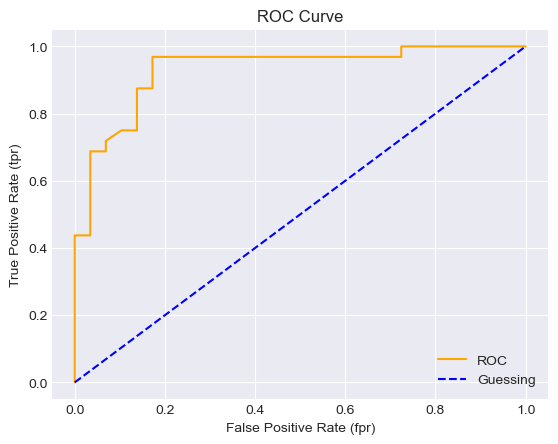

In [116]:
plot_ROC(fpr, tpr)

In [117]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_proba_postive)

0.9304956896551724

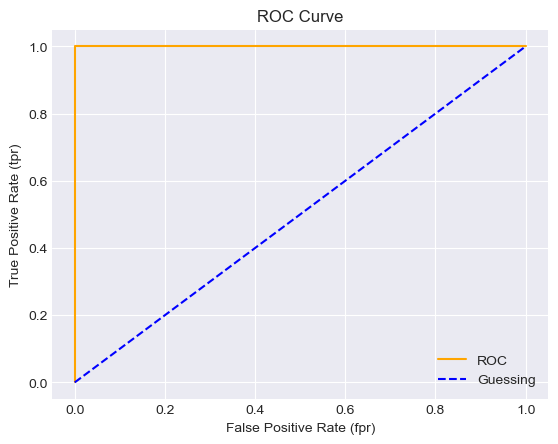

In [118]:
# Perfect ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_ROC(fpr, tpr)

**Confusion Matrix**

Compares the labels a model predicts and the actual labels it was supposed to predict, i.e. gives you an idea of where the model is getting confused

In [119]:
from sklearn.metrics import confusion_matrix

y_predict = model.predict(X_test)

confusion_matrix(y_test, y_predict)

array([[24,  5],
       [ 4, 28]])

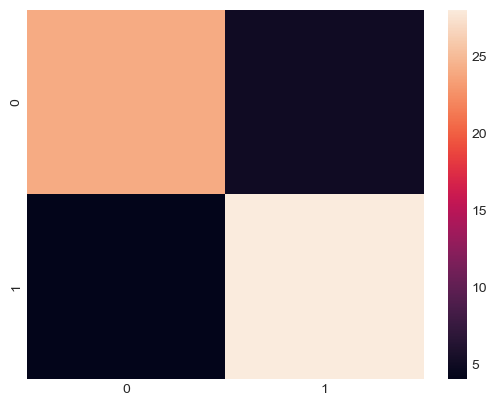

In [120]:
# Make visual confusion matrix with seaborn
conf_matrix = confusion_matrix(y_test, y_predict)

sns.heatmap(conf_matrix);

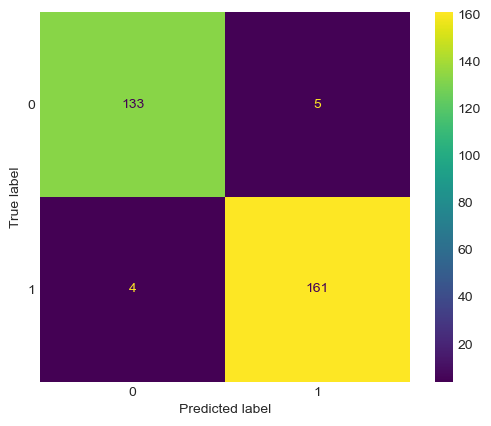

In [121]:
from sklearn.metrics import ConfusionMatrixDisplay
plt.style.use("seaborn-v0_8-dark")
ConfusionMatrixDisplay.from_estimator(estimator=model, X=X, y=y);

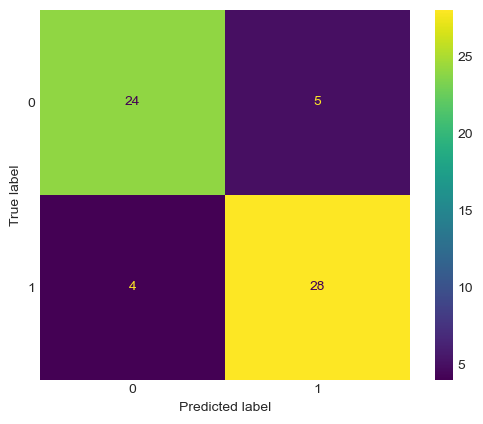

In [122]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_predict)

**Classification Report**

In [123]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



Meaning of the report:
* Precision - Indicates the proportion of positive identifications (prediction = 1) which were actually correct. A model which produces no false positives has a precision of 1.0
* Recall - Indicates the proportion of actual positivies which were correctly classified. A model that produces no false negatives has a recall of 1.0
* F-1 score - A combination of precision and recall. A perfect model achieves a score of 1.0
* Support - The number of sample each metric was calculated on
* Accuracy - The accuracy of the model in decimal form
* Macro avg - The average precision, recall and F-1 score between classes. Pay attention to this if you have class imbalances (i.e. more samples of 0 than 1 or vise versa)
* Weighted avg - The weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples are in each class. This metric will favour the mjority class (e.g. high values when one class out performs the other due to having more samples)

In [124]:
# Where precision and recall are valuable

disease_sample = np.zeros(10000)
disease_sample[0] = 1 # only one positive case

disease_predict = np.zeros(10000) # model predicts 0 for every case

pd.DataFrame(classification_report(disease_sample, disease_predict, output_dict=True))

/Users/yogeshprabhu/Documents/Computer Science/ztm ml/sample_project/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yogeshprabhu/Documents/Computer Science/ztm ml/sample_project/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yogeshprabhu/Documents/Computer Science/ztm ml/sample_project/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicte

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


**Regression Model Evaluation Metrics**
1. R^2 coefficient of determination
2. Mean absolute error
3. Mean squared error

In [125]:
np.random.seed(42)

X = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [126]:
model.score(X_test, y_test)

0.8059809073051385

In [127]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [128]:
from sklearn.metrics import r2_score

y_test_mean = np.full(len(y_test), y_test.mean())

In [129]:
y_test_mean

array([2.0550031, 2.0550031, 2.0550031, ..., 2.0550031, 2.0550031,
       2.0550031])

In [130]:
r2_score(y_true=y_test, y_pred=y_test_mean)

0.0

In [131]:
r2_score(y_true=y_test, y_pred=y_test)

1.0

Mean absolute error is the average of the absolute difference between predictions and actual values. It give you an idea of how wrong your model predictions are

In [132]:
from sklearn.metrics import mean_absolute_error

y_predict = model.predict(X_test)
mae = mean_absolute_error(y_true=y_test, y_pred=y_predict)
mae

0.3270458119670544

In [133]:
y_predict

array([0.49058  , 0.75989  , 4.9350165, ..., 4.8539888, 0.71491  ,
       1.66568  ])

In [134]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: MedHouseVal, Length: 4128, dtype: float64

In [135]:
df = pd.DataFrame(data={"actual" : y_test, "predicted" : y_predict})
df["difference"] = df["predicted"] - df["actual"]
df.head()

,actual,predicted,difference
20046,0.47700,0.490580,0.013580
3024,0.45800,0.759890,0.301890
15663,5.00001,4.935016,-0.064994
20484,2.18600,2.558640,0.372640
9814,2.78000,2.334610,-0.445390


In [136]:
np.abs(df["difference"]).mean() #MAE

0.3270458119670544

Mean squared error is the mean of the square of the errors between actual and predicted values

In [137]:
from sklearn.metrics import mean_squared_error

y_predict = model.predict(X_test)
mse = mean_squared_error(y_true=y_test, y_pred=y_predict)
mse

0.2542443610174998

In [138]:
df["squared difference"] = np.square(df["difference"])
df.head()

,actual,predicted,difference,squared difference
20046,0.47700,0.490580,0.013580,0.000184
3024,0.45800,0.759890,0.301890,0.091138
15663,5.00001,4.935016,-0.064994,0.004224
20484,2.18600,2.558640,0.372640,0.138861
9814,2.78000,2.334610,-0.445390,0.198372


In [139]:
df["squared difference"].mean()

0.2542443610174998

**Using the scoring parameter**

In [140]:
np.random.seed(42)

X = heart_disease_data.drop("target", axis=1)
y = heart_disease_data["target"]

model = RandomForestClassifier()

In [141]:
np.random.seed(42)

cv_acc = cross_val_score(model, X, y, cv=5, scoring=None) # default scoring is accuracy for classification models
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [142]:
print(f"The cross-validated accuracy is: {np.mean(cv_acc) *100}%")

The cross-validated accuracy is: 82.48087431693989%


In [144]:
np.random.seed(42)
cv_acc = cross_val_score(model, X, y, cv=5, scoring="accuracy") # default scoring is accuracy for classification models
cv_precision = cross_val_score(model, X, y, cv=5, scoring="precision")
cv_precision

array([0.76315789, 0.90322581, 0.83870968, 0.79411765, 0.74358974])

In [146]:
np.random.seed(42)
cv_recall = cross_val_score(model, X, y, cv=5, scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

Scorring for regression problems

In [147]:
np.random.seed(42)

X = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"]

model = RandomForestRegressor()

In [148]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring=None) # default for regression models is r^2 value

In [149]:
np.mean(cv_r2)

0.6516423891480653

In [150]:
cv_r2

array([0.51648146, 0.70255896, 0.74089371, 0.61492293, 0.68335489])

In [154]:
cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error") # neg at the start because all evaluation metrics in cross val are following the rule of higher the better
cv_mae

array([-0.54579905, -0.40576483, -0.43496067, -0.46379509, -0.47408489])

In [157]:
np.mean(cv_mae)

-0.4648809080426357

In [155]:
cv_mse = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
cv_mse

array([-0.5264274 , -0.3478495 , -0.37509155, -0.44036892, -0.46395066])

In [156]:
np.mean(cv_mse)

-0.43073760752054885

**Metric Functions**

In [158]:
# Classification Problem
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = heart_disease_data.drop("target", axis=1)
y = heart_disease_data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

acc_score = accuracy_score(y_test, y_predict)
pre_score = precision_score(y_test, y_predict)
re_score = recall_score(y_test, y_predict)
f_score = f1_score(y_test, y_predict)

acc_score, pre_score, re_score, f_score

(0.8360655737704918,
 0.9310344827586207,
 0.7714285714285715,
 0.8437500000000001)

In [159]:
# Regression Problem
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

X = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

r_score = r2_score(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)

r_score, mse, mae

(0.8119725189794936, 0.2550467373722351, 0.32374883592538783)

### 5. Improving a Model

First predictions = baseline predictions
First model = baseline model

From a data perspective:
* Need more data?
* Could we improve our data?

From a model perspective:
* Is there a better model?
* Can we improve our current model?

Parameters = model find these patterns in data
Hyperparameters = setting on a model you can adjust to potentially improve it

In [160]:
model = RandomForestClassifier()
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

How to adjust hyperparameters?
* By hand
* Randomly with RandomSearchCV
* Exhaustively with GridSearchCV

**Tuning by hand**

We try to adjust:
* max_depth
* max_features
* min_samples_leaf
* min_samples_split
* n_estimators

In [163]:
def evaluate_class_model (y_true, y_pred):

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    metrics = {"accuracy" : accuracy,
               "precision" : precision,
               "recall" : recall,
               "f1 score" : f1}

    print(f"Accuracy: {accuracy*100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    return metrics

In [194]:
np.random.seed(42)

heart_disease_data_shuffled = heart_disease_data.sample(frac=1)

X = heart_disease_data_shuffled.drop("target", axis=1)
y = heart_disease_data_shuffled["target"]

train_split = round(0.7 * len(heart_disease_data_shuffled))
valid_split = round(train_split + 0.15 * len(heart_disease_data_shuffled))

X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]
len(X_train), len(X_valid), len(X_test)

model = RandomForestClassifier()

model.fit(X_train, y_train)

baseline_preds = model.predict(X_valid)

baseline_metrics = evaluate_class_model(y_valid, baseline_preds)

Accuracy: 82.22%
Precision: 0.81
Recall: 0.88
F1 Score: 0.85


In [195]:
np.random.seed(42)

# Create a second calssifier with different hyperparameters

model_2 = RandomForestClassifier(n_estimators=100)
model_2.fit(X_train, y_train)

y_preds_2 = model_2.predict(X_valid)

model_2_metrics = evaluate_class_model(y_valid, y_preds_2)

Accuracy: 80.00%
Precision: 0.83
Recall: 0.80
F1 Score: 0.82


In [196]:
np.random.seed(42)

model_3 = RandomForestClassifier(max_depth=10)
model_3.fit(X_train, y_train)
y_preds_3 = model_3.predict(X_valid)

model_3_metrics = evaluate_class_model(y_valid, y_preds_3)

Accuracy: 82.22%
Precision: 0.84
Recall: 0.84
F1 Score: 0.84


**Using RandomizedSearchCV**

In [177]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators" : [10, 100, 1000, 1500],
        "max_depth" : [None, 5, 10, 20, 30],
        "max_features" : ["auto", "sqrt"],
        "min_samples_leaf" : [1 ,2, 3],
        "min_samples_split" : [2, 4, 6]}

np.random.seed(42)

X = heart_disease_data_shuffled.drop("target", axis=1)
y = heart_disease_data_shuffled["target"]

X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.2)

model = RandomForestClassifier(n_jobs=-1)

rs_model = RandomizedSearchCV(estimator=model, param_distributions=grid, n_iter=10, cv=5, verbose=2) #n_iter is the number of different models to try i.e. number of combinations for different models

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   1.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2,

/Users/yogeshprabhu/Documents/Computer Science/ztm ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/yogeshprabhu/Documents/Computer Science/ztm ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/yogeshprabhu/Documents/Computer Science/ztm ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has 

[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.2s


/Users/yogeshprabhu/Documents/Computer Science/ztm ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.2s


/Users/yogeshprabhu/Documents/Computer Science/ztm ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.2s


/Users/yogeshprabhu/Documents/Computer Science/ztm ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.2s


/Users/yogeshprabhu/Documents/Computer Science/ztm ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s


/Users/yogeshprabhu/Documents/Computer Science/ztm ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/yogeshprabhu/Documents/Computer Science/ztm ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/yogeshprabhu/Documents/Computer Science/ztm ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has 

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=1500; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=1500; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=1500; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=1500; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=1500; total time=   0.3s


/Users/yogeshprabhu/Documents/Computer Science/ztm ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.2s


/Users/yogeshprabhu/Documents/Computer Science/ztm ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.2s


/Users/yogeshprabhu/Documents/Computer Science/ztm ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.2s


/Users/yogeshprabhu/Documents/Computer Science/ztm ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.2s


/Users/yogeshprabhu/Documents/Computer Science/ztm ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_sam

/Users/yogeshprabhu/Documents/Computer Science/ztm ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/yogeshprabhu/Documents/Computer Science/ztm ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/yogeshprabhu/Documents/Computer Science/ztm ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has 

[CV] END max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s


/Users/yogeshprabhu/Documents/Computer Science/ztm ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 1000, 1500]},
                   verbose=2)

In [178]:
rs_model.best_params_

{'n_estimators': 1000,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 5}

In [212]:
# Making predictions with the best parameters, you won't always get something better
np.random.seed(42)
rs_y_predict = rs_model.predict(X_test)

rs_metrics = evaluate_class_model(y_test, rs_y_predict)

Accuracy: 91.30%
Precision: 0.92
Recall: 0.92
F1 Score: 0.92


**Using GridSearchCV**

In [213]:
# brute force search, will go through every single combination according to the grid

grid

{'n_estimators': [10, 100, 1000, 1500],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 3],
 'min_samples_split': [2, 4, 6]}

In [214]:
grid_2 = {"n_estimators" : [100, 1000, 1500],
          "max_depth" : [None, 5, 10, 20],
          "max_features" : ["auto"],
          "min_samples_leaf" : [1 ,2],
          "min_samples_split" : [4]}

In [186]:
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

X = heart_disease_data_shuffled.drop("target", axis=1)
y = heart_disease_data_shuffled["target"]

X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.2)

model = RandomForestClassifier(n_jobs=-1)

gs_model = GridSearchCV(estimator=model, param_grid=grid_2, cv=5, verbose=1)

gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/Users/yogeshprabhu/Documents/Computer Science/ztm ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/yogeshprabhu/Documents/Computer Science/ztm ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/yogeshprabhu/Documents/Computer Science/ztm ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has 

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'max_features': ['auto'], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [4],
                         'n_estimators': [100, 1000, 1500]},
             verbose=1)

In [187]:
gs_model.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 100}

In [215]:
np.random.seed(42)
gs_y_predict = gs_model.predict(X_test)

gs_metrics = evaluate_class_model(y_test, gs_y_predict)

Accuracy: 93.48%
Precision: 0.92
Recall: 0.96
F1 Score: 0.94


**Comparing models**

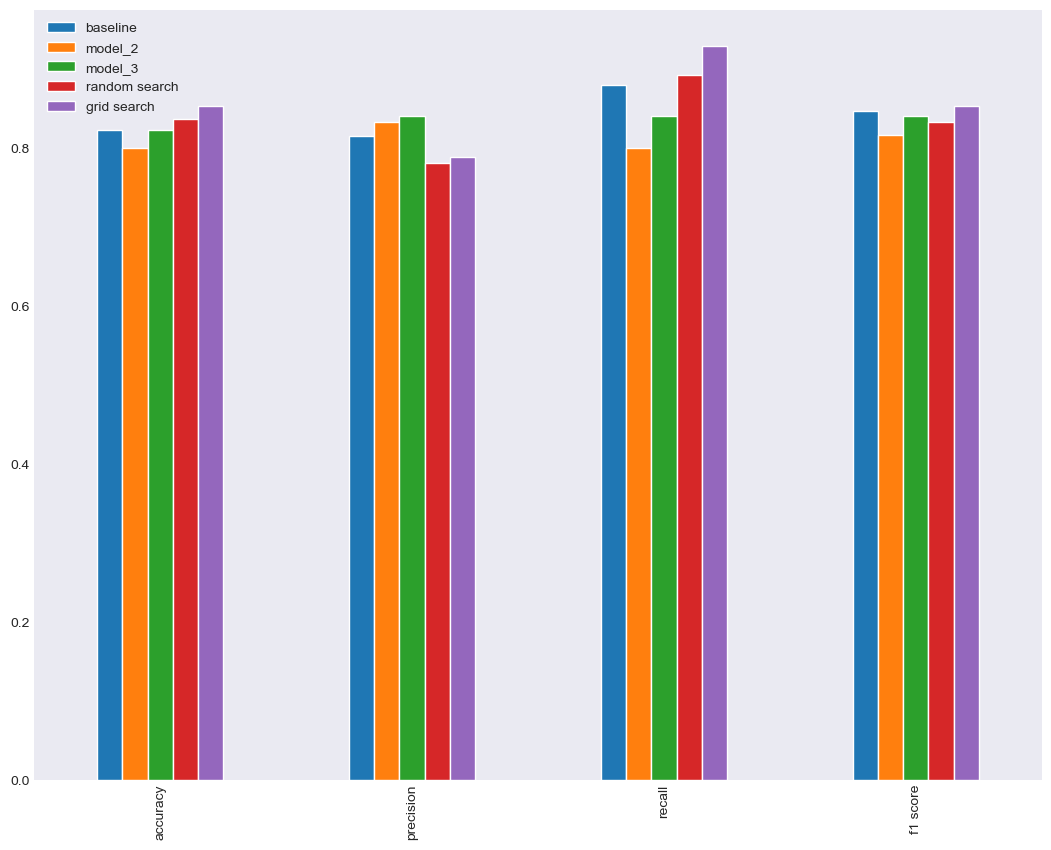

In [205]:
compare_metrics = pd.DataFrame({"baseline":baseline_metrics, "model_2":model_2_metrics, "model_3":model_3_metrics, "random search":rs_metrics, "grid search":gs_metrics})

compare_metrics.plot.bar(figsize=(13,10));

### 6. Save, load and share a model

Two Ways:
1. `pickle` module
2. `joblib` module

**Using Pickle**

In [208]:
import pickle

# Save an existing model to file
pickle.dump(gs_model, open("models/gs_random_forrest_model_1.pkl", "wb"))

In [210]:
#Load saved model

loaded_pickle_model = pickle.load(open("models/gs_random_forrest_model_1.pkl", "rb"))

In [216]:
np.random.seed(42)
loaded_pickle_model_predict = loaded_pickle_model.predict(X_test)
loaded_pickle_model_metrics = evaluate_class_model(y_test, loaded_pickle_model_predict)

Accuracy: 93.48%
Precision: 0.92
Recall: 0.96
F1 Score: 0.94


**Using joblib**

In [217]:
from joblib import dump, load

dump(gs_model, filename="models/gs_random_forest_model_1.joblib")

['models/gs_random_forest_model_1.joblib']

In [218]:
loaded_joblib_model = load(filename="models/gs_random_forest_model_1.joblib")

In [219]:
np.random.seed(42)
loaded_joblib_model_predict = loaded_joblib_model.predict(X_test)
loaded_joblib_model_metrics = evaluate_class_model(y_test, loaded_joblib_model_predict)

Accuracy: 93.48%
Precision: 0.92
Recall: 0.96
F1 Score: 0.94


### 7. Everything All Together

In [223]:
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [226]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [227]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Pipline Steps:
1. Fill in missing data
2. Covert data to numerical values
3. Build a model on the data

In [237]:
from sklearn.pipeline import Pipeline

np.random.seed(42)

data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
     ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("categorical", categorical_transformer, categorical_features),
        ("door", door_transformer, door_feature),
        ("numerical", numeric_transformer, numeric_features)
    ]
)

model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])

X = data.drop("Price", axis=1)
y = data["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

You can also use gridsearchCV and randomized searchCV with pipeline

In [239]:
pipe_grid = {
    "preprocessor__numerical__imputer__strategy":["mean", "median"],
    "model__n_estimators":[100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features":["auto", "sqrt"],
    "model__min_samples_split":[2,4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=1)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


/Users/yogeshprabhu/Documents/Computer Science/ztm ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/yogeshprabhu/Documents/Computer Science/ztm ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/yogeshprabhu/Documents/Computer Science/ztm ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been depre

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('numerical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['auto', 'sqrt'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__numerical__imputer__strategy': ['mean',
                                                                        'median']},
             verbose=1)

In [240]:
gs_model.best_params_

{'model__max_depth': 5,
 'model__max_features': 'sqrt',
 'model__min_samples_split': 2,
 'model__n_estimators': 100,
 'preprocessor__numerical__imputer__strategy': 'mean'}

In [244]:
gs_model.score(X_test, y_test)

0.292308819012865